# Lab tasks
### Dataset Description
This dataset contains information about 1,000 movies and web-series released across major streaming platforms (Netflix, Amazon Prime, Disney+, Hulu, HBO Max, and Theaters). It’s designed to simulate real-world entertainment industry data used by analysts for content performance tracking and recommendation systems.

### Columns Description:
* movie_id: Unique identifier for each movie/series
* title: Name of the movie or show
* platform: Platform where it was released (Netflix, Prime, Disney+, Hulu, HBO, Theater)
* genre: Movie genre (Action, Drama, Comedy, Sci-Fi, Romance, Documentary, Thriller)
* release_year: Year of release (1990–2025)
* budget_million: Production budget in millions (1–300M)
* box_office_million: Box office or streaming revenue in millions (0.5–1000M)
* critic_score: Critic ratings (40–100)
* audience_score: Viewer ratings (1–10)
* views_million: Number of total global views (0.1–500M)
* region: Main release region (NA, EU, Asia, SA, Africa, Oceania)

# Question # 01
As a data analyst at CineVision Analytics, your task is to explore and understand movie performance trends.

* Load the dataset and display its basic information (shape, column types, missing values).
* Compute summary statistics for numeric columns and detect any unusual values.
* Identify the top 5 genres by average box_office_million and views_million.
* Find which platform has the highest average critic_score and audience_score.
* Explore release trends:
  * Movies released per year
  * Compare pre-2020 vs post-2020 releases (count & average revenue)
* Correlation Analysis:
  * Find correlation between budget_million, box_office_million, views_million, and critic_score.
* Determine which region dominates in terms of:
  * Highest total revenue
  * Highest average audience score
* Plot at least three visualizations (bar chart, ++, scatter plot) that best describe insights about the movie industry.



In [6]:
# Solution # 01
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataset=pd.read_csv("C:\\Users\\HP\\Desktop\movies_dataset_with_missing_values.csv")
dataset



,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region
0,1.0,Movie_1,Hulu,Documentary,2004.0,238.19,361.08,66.0,8.1,127.20,Oceania
1,2.0,Movie_2,HBO,Romance,2023.0,95.71,224.12,41.0,3.5,315.56,Africa
2,3.0,Movie_3,Disney+,Documentary,2024.0,257.30,952.06,70.0,9.2,12.59,Oceania
3,4.0,Movie_4,HBO,Documentary,2014.0,271.94,93.15,96.0,NaN,360.39,Oceania
4,NaN,Movie_5,NaN,Thriller,2013.0,83.79,257.27,NaN,8.7,257.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Movie_996,Theater,Action,1998.0,130.64,56.29,56.0,9.4,331.43,NaN
996,997.0,Movie_997,NaN,Romance,NaN,28.70,93.78,84.0,4.2,295.13,NaN
997,998.0,Movie_998,Netflix,Comedy,2007.0,224.77,517.89,52.0,5.0,211.41,Oceania
998,999.0,Movie_999,Netflix,Comedy,2009.0,274.45,789.40,46.0,7.0,100.52,NaN


In [8]:
rows,col=dataset.shape
print("Rows :",rows)
print("Cols :",col)

Rows : 1000
Cols : 11


In [26]:
dataset.dtypes

movie_id              float64
title                  object
platform               object
genre                  object
release_year          float64
budget_million        float64
box_office_million    float64
critic_score          float64
audience_score        float64
views_million         float64
region                 object
dtype: object

In [40]:
dataset.isnull()

,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region,newdataset
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,True,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,False,False,False,False,False,False,False,False,False,True,False
996,False,False,True,False,True,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [29]:
dataset.describe()

,movie_id,release_year,budget_million,box_office_million,critic_score,audience_score,views_million
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,496.812222,2007.598889,150.117989,385.275700,70.202222,5.489111,248.739256
std,290.148628,10.253852,87.219525,318.167413,17.554656,2.577108,144.752045
min,1.000000,1990.000000,1.000000,1.380000,40.000000,1.000000,0.410000
25%,243.750000,1999.000000,80.252500,119.690000,55.000000,3.300000,121.532500
50%,497.000000,2008.000000,148.470000,296.385000,69.000000,5.500000,251.910000
75%,749.250000,2016.000000,226.310000,573.317500,85.000000,7.700000,364.700000
max,1000.000000,2025.000000,299.350000,1464.990000,100.000000,10.000000,499.920000


In [39]:
dataset["newdataset"] = (dataset["box_office_million"].mean() + dataset["views_million"].mean()) / 2

dataset

,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region,newdataset
0,1.0,Movie_1,Hulu,Documentary,2004.0,238.19,361.08,66.0,8.1,127.20,Oceania,317.007478
1,2.0,Movie_2,HBO,Romance,2023.0,95.71,224.12,41.0,3.5,315.56,Africa,317.007478
2,3.0,Movie_3,Disney+,Documentary,2024.0,257.30,952.06,70.0,9.2,12.59,Oceania,317.007478
3,4.0,Movie_4,HBO,Documentary,2014.0,271.94,93.15,96.0,NaN,360.39,Oceania,317.007478
4,NaN,Movie_5,NaN,Thriller,2013.0,83.79,257.27,NaN,8.7,257.06,NaN,317.007478
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Movie_996,Theater,Action,1998.0,130.64,56.29,56.0,9.4,331.43,NaN,317.007478
996,997.0,Movie_997,NaN,Romance,NaN,28.70,93.78,84.0,4.2,295.13,NaN,317.007478
997,998.0,Movie_998,Netflix,Comedy,2007.0,224.77,517.89,52.0,5.0,211.41,Oceania,317.007478
998,999.0,Movie_999,Netflix,Comedy,2009.0,274.45,789.40,46.0,7.0,100.52,NaN,317.007478


In [46]:
newdataset=dataset.sort_values(by=["newdataset","box_office_million", "views_million"], ascending=False)
newdataset

,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region,newdataset
685,686.0,Movie_686,Hulu,Thriller,1997.0,298.45,1464.99,76.0,9.9,252.01,EU,317.007478
701,702.0,Movie_702,Prime,Action,2002.0,293.22,1424.38,74.0,8.4,180.06,NaN,317.007478
809,810.0,Movie_810,Netflix,NaN,1993.0,290.09,1420.94,99.0,8.6,90.52,Oceania,317.007478
699,700.0,Movie_700,HBO,Romance,2016.0,288.08,1418.15,67.0,3.9,342.53,NaN,317.007478
955,956.0,Movie_956,Theater,Comedy,2001.0,285.48,1416.62,59.0,5.9,412.82,Oceania,317.007478
...,...,...,...,...,...,...,...,...,...,...,...,...
15,16.0,Movie_16,Hulu,NaN,2004.0,264.84,NaN,60.0,1.8,NaN,EU,317.007478
155,NaN,NaN,HBO,Thriller,2025.0,130.94,NaN,72.0,1.6,NaN,Oceania,317.007478
517,518.0,Movie_518,HBO,Documentary,1998.0,NaN,NaN,NaN,1.1,NaN,Asia,317.007478
855,856.0,Movie_856,Prime,Comedy,NaN,NaN,NaN,63.0,3.0,NaN,Africa,317.007478


In [47]:
newdataset.head()

,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region,newdataset
685,686.0,Movie_686,Hulu,Thriller,1997.0,298.45,1464.99,76.0,9.9,252.01,EU,317.007478
701,702.0,Movie_702,Prime,Action,2002.0,293.22,1424.38,74.0,8.4,180.06,NaN,317.007478
809,810.0,Movie_810,Netflix,NaN,1993.0,290.09,1420.94,99.0,8.6,90.52,Oceania,317.007478
699,700.0,Movie_700,HBO,Romance,2016.0,288.08,1418.15,67.0,3.9,342.53,NaN,317.007478
955,956.0,Movie_956,Theater,Comedy,2001.0,285.48,1416.62,59.0,5.9,412.82,Oceania,317.007478


In [45]:
critic_score1 = dataset["critic_score"].mean()

audience_score1 = dataset["audience_score"].mean()

if(critic_score1 > audience_score1):
    print("critic_score has higher average")
else:  print(" audience_score has higher average")

critic_score has higher average


In [50]:
movies_per_year = dataset['release_year'].value_counts()
movies_per_year

2010.0    42
2014.0    33
2004.0    30
2009.0    30
1997.0    29
1991.0    29
1995.0    29
2007.0    29
2011.0    28
2025.0    28
2017.0    27
1999.0    26
2022.0    26
2024.0    25
2015.0    25
2021.0    25
2001.0    25
1993.0    25
2003.0    25
2013.0    25
2023.0    24
2000.0    24
2005.0    23
2002.0    23
2008.0    23
1994.0    23
2019.0    23
2020.0    22
1996.0    22
1992.0    21
2012.0    21
1998.0    19
2018.0    19
1990.0    19
2006.0    18
2016.0    15
Name: release_year, dtype: int64

In [53]:
pre2020 = dataset[dataset.release_year<2020]
post2020 = dataset[dataset.release_year>=2020]

print("pre 2020 :",len(pre2020))
print("post 2020 :",len(post2020))

pre 2020 : 750
post 2020 : 150


In [57]:
print("--------AVERAGE----------")
print(pre2020["box_office_million"].mean())


--------AVERAGE----------
388.1318155197658


In [58]:
print("--------AVERAGE----------")
print(post2020["box_office_million"].mean())


--------AVERAGE----------
415.16203252032517


In [69]:

get_column_from_dataset = dataset[['budget_million', 'box_office_million', 'views_million', 'critic_score']]

print("CORELATION MATRIX\n :",select_column_from_dataset.corr())


CORELATION MATRIX
 :                     budget_million  box_office_million  views_million  \
budget_million            1.000000            0.688153      -0.001164   
box_office_million        0.688153            1.000000       0.001082   
views_million            -0.001164            0.001082       1.000000   
critic_score             -0.024450           -0.013798      -0.020614   

                    critic_score  
budget_million         -0.024450  
box_office_million     -0.013798  
views_million          -0.020614  
critic_score            1.000000  


In [82]:
print("Highest total revenue")
dataset.loc[dataset.box_office_million==dataset.box_office_million.max(),['region']]

Highest total revenue


,region
685,EU


In [83]:
print("Highest average audience score")
dataset.loc[dataset.audience_score==dataset.audience_score.max(),['region']]

Highest average audience score


,region
66,Africa
541,NaN
634,Africa
912,Africa
945,Oceania


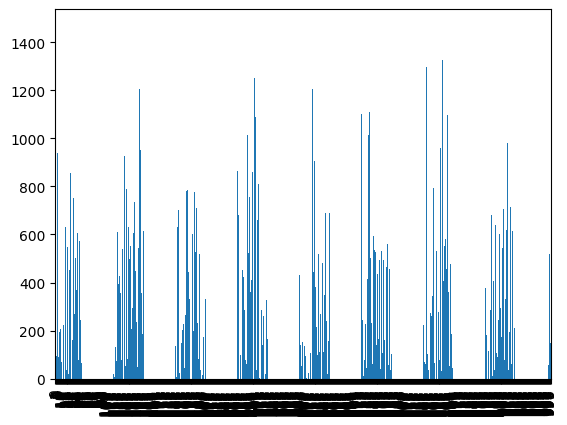

In [91]:
dataset['box_office_million'].plot(kind='bar')
plt.show()

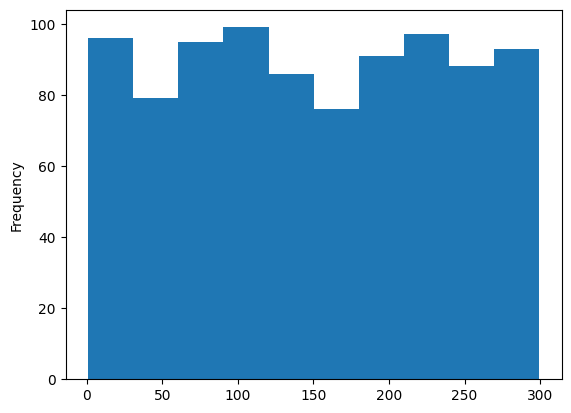

In [104]:
dataset.budget_million.plot(kind='hist')
plt.show()

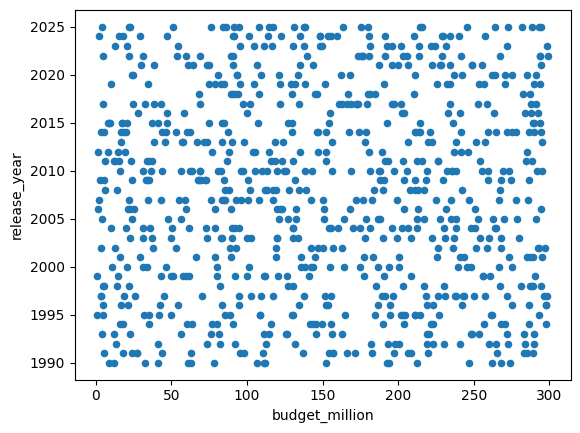

In [105]:
dataset.plot(kind='scatter', x='budget_million', y='release_year')
plt.show()

### Question # 02

You are preparing a strategic analysis report for a streaming company to evaluate profitability and predict future movie performance.

1. Profitability Analysis:
    Create a new column profit_margin = (box_office_million - budget_million) / budget_million * 100, and identify the top 10 most profitable movies overall and by genre.

2. Genre & Platform Comparison:
    Compare average profit_margin, critic_score, and audience_score across all genres and platforms using grouped summaries and visualizations.

3. Predictive Modeling:
    Build a Linear Regression model to predict box_office_million using features budget_million, critic_score, audience_score, and views_million. Report model accuracy (R² score) and interpret key factors influencing movie revenue.

4. Business Insights:
    From your analysis, provide three actionable recommendations for company management—such as which genres or platforms show the best profitability trends and where investment should be increased.

In [111]:
dataset['profit_margin']= (dataset['box_office_million'] -dataset['budget_million']*1)  / dataset['budget_million']*100
dataset

,movie_id,title,platform,genre,release_year,budget_million,box_office_million,critic_score,audience_score,views_million,region,profit_margin
522,523.0,Movie_523,Disney+,Documentary,2016.0,27.70,8.40,45.0,NaN,370.22,NaN,-69.675090
113,114.0,Movie_114,HBO,Documentary,2007.0,85.17,26.35,61.0,3.1,114.77,EU,-69.061876
213,214.0,NaN,Netflix,Sci-Fi,2001.0,118.98,38.67,50.0,2.1,172.45,NaN,-67.498739
808,809.0,Movie_809,Theater,Sci-Fi,1996.0,219.07,72.29,88.0,1.0,246.50,Asia,-67.001415
640,641.0,Movie_641,Hulu,Thriller,2010.0,187.10,62.18,89.0,3.0,236.55,Oceania,-66.766435
...,...,...,...,...,...,...,...,...,...,...,...,...
967,968.0,Movie_968,Hulu,Action,2010.0,NaN,638.10,54.0,8.1,143.56,Asia,NaN
973,974.0,Movie_974,Hulu,Comedy,2017.0,32.67,NaN,53.0,9.2,241.49,NaN,NaN
982,983.0,Movie_983,Netflix,Comedy,2012.0,NaN,112.65,64.0,7.0,106.22,Africa,NaN
984,985.0,Movie_985,Disney+,Documentary,2008.0,NaN,752.41,86.0,1.1,237.41,SA,NaN


In [8]:
dataset['profit_margin'] = ((dataset['box_office_million'] - dataset['budget_million']) / dataset['budget_million']) * 100


top10_overall = dataset.sort_values(by='profit_margin', ascending=False).head(10)
print("Top 10 Most Profitable Movies Overall:")
print(top10_overall[['title', 'profit_margin']])



top10_by_genre = dataset.groupby('genre').apply(lambda g: g.sort_values(by='profit_margin', ascending=False).head(10))

print("\nTop 10 Most Profitable Movies by Genre:")
print(top10_by_genre[['title', 'genre', 'profit_margin']])




summary = dataset.groupby(['genre', 'platform']).agg({
    'profit_margin': 'mean',
    'critic_score': 'mean',
    'audience_score': 'mean'
}).reset_index()


print("\nAverage Profit Margin, Critic and Audience Scores by Genre & Platform:")
print(summary)


model_data = dataset.dropna(subset=['box_office_million', 'budget_million', 'critic_score', 'audience_score', 'views_million'])
X = model_data[['budget_million', 'critic_score', 'audience_score', 'views_million']].copy()
y = model_data['box_office_million']
X['intercept'] = 1


X_mat = X.values
y_mat = y.values.reshape(-1, 1)

beta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y_mat)
coefficients = pd.Series(beta.flatten(), index=X.columns)


print("\nRegression Coefficients:")
print(coefficients)


y_pred = X_mat.dot(beta)
ss_total = np.sum((y_mat - np.mean(y_mat))**2)
ss_residual = np.sum((y_mat - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)


print(f"\nR-squared: {r2:.4f}")




Top 10 Most Profitable Movies Overall:
         title  profit_margin
545  Movie_546     399.789626
303        NaN     398.881330
398  Movie_399     398.701374
197  Movie_198     398.674727
291  Movie_292     398.190002
339  Movie_340     397.946136
955  Movie_956     396.223904
327  Movie_328     395.620291
820  Movie_821     395.460638
469  Movie_470     395.043569

Top 10 Most Profitable Movies by Genre:
                  title     genre  profit_margin
genre                                           
Action   931        NaN    Action     394.558718
         701  Movie_702    Action     385.771775
         778  Movie_779    Action     380.308328
         816  Movie_817    Action     374.974557
         92    Movie_93    Action     372.326001
...                 ...       ...            ...
Thriller 350  Movie_351  Thriller     372.593951
         411  Movie_412  Thriller     370.844275
         989        NaN  Thriller     366.564855
         621  Movie_622  Thriller     366.451895
  

In [7]:

top_genre = summary.groupby('genre')['profit_margin'].mean().idxmax()
print("\nBusiness Insights:")
print(f"1. Invest in {top_genre} genre for better profit margins.")
print("2. Prioritize platforms with higher profits.")
print("3. Focus on budget and audience engagement to boost revenue.")



Business Insights:
1. Invest in Romance genre for better profit margins.
2. Prioritize platforms with higher profits.
3. Focus on budget and audience engagement to boost revenue.


In [ ]:
# Solution # 02